In [ ]:
import pandas as pd 
import sklearn
import sklearn.model_selection
import sklearn.preprocessing

data = pd.read_csv('high_diamond_ranked_10min.csv')

X = data.drop(['blueWins', 'gameId'], axis=1)
y = data['blueWins']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# scale data so all equally impactful on analysis
scaler = sklearn.preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
model = sklearn.linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.26973684210526316


In [37]:
weights = model.coef_
print(f"weights: {weights}")

weights: [[-0.19767857  0.15462189 -0.03096076  0.09208585 -0.06942289 -0.13981481
   0.12492062  0.22180595  0.02803528 -0.02871271  1.63812807 -0.04249888
   0.75884935 -0.19750224  0.73737878  1.62758744  1.26226847 -0.19750224
   1.63812807 -0.70632125 -0.01140597 -0.11689957 -0.06942289  0.09208585
   0.12006484 -0.12113867 -0.19399163 -0.04828571  0.52593947 -1.43856048
   0.01279542 -1.21461446  0.23585701  0.37317143 -1.77544778 -1.41012881
   0.23585701 -1.43856048]]


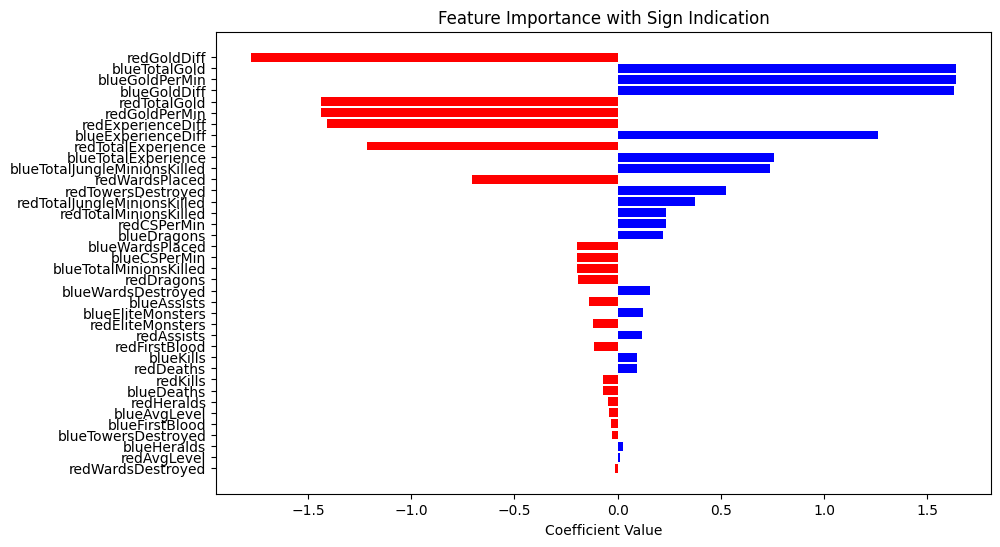

Sorted Features: ['redGoldDiff', 'blueTotalGold', 'blueGoldPerMin', 'blueGoldDiff', 'redTotalGold', 'redGoldPerMin', 'redExperienceDiff', 'blueExperienceDiff', 'redTotalExperience', 'blueTotalExperience', 'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redTowersDestroyed', 'redTotalJungleMinionsKilled', 'redTotalMinionsKilled', 'redCSPerMin', 'blueDragons', 'blueWardsPlaced', 'blueCSPerMin', 'blueTotalMinionsKilled', 'redDragons', 'blueWardsDestroyed', 'blueAssists', 'blueEliteMonsters', 'redEliteMonsters', 'redAssists', 'redFirstBlood', 'blueKills', 'redDeaths', 'redKills', 'blueDeaths', 'redHeralds', 'blueAvgLevel', 'blueFirstBlood', 'blueTowersDestroyed', 'blueHeralds', 'redAvgLevel', 'redWardsDestroyed']
Sorted Weights: [-1.77544778  1.63812807  1.63812807  1.62758744 -1.43856048 -1.43856048
 -1.41012881  1.26226847 -1.21461446  0.75884935  0.73737878 -0.70632125
  0.52593947  0.37317143  0.23585701  0.23585701  0.22180595 -0.19767857
 -0.19750224 -0.19750224 -0.19399163  0.1546

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Given feature names and the model's coefficients:
feature_names = ["blueWardsPlaced","blueWardsDestroyed","blueFirstBlood","blueKills","blueDeaths","blueAssists","blueEliteMonsters","blueDragons","blueHeralds","blueTowersDestroyed","blueTotalGold","blueAvgLevel","blueTotalExperience","blueTotalMinionsKilled","blueTotalJungleMinionsKilled","blueGoldDiff","blueExperienceDiff","blueCSPerMin","blueGoldPerMin","redWardsPlaced","redWardsDestroyed","redFirstBlood","redKills","redDeaths","redAssists","redEliteMonsters","redDragons","redHeralds","redTowersDestroyed","redTotalGold","redAvgLevel","redTotalExperience","redTotalMinionsKilled","redTotalJungleMinionsKilled","redGoldDiff","redExperienceDiff","redCSPerMin","redGoldPerMin"]
weights = model.coef_[0]  # e.g., array([-0.68921169, -0.27942878, -0.03929409, -0.34200963, 
                         #           0.38140483,  0.00446081,  0.15930608,  0.00454353])

# Sort features by absolute value of coefficients (largest first)
sorted_indices = np.argsort(np.abs(weights))[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_weights = weights[sorted_indices]

# Map positive values to blue and negative to red
colors = ['blue' if w > 0 else 'red' for w in sorted_weights]

# Create a horizontal bar plot with colors indicating the sign
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_weights, color=colors)
plt.xlabel("Coefficient Value")
plt.title("Feature Importance with Sign Indication")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

# Print sorted features and corresponding coefficient values
print("Sorted Features:", sorted_features)
print("Sorted Weights:", sorted_weights)